# Predictions of Car Prices
### Hugh Steele

In this report I will be attempting to predict the prices of models of car from each car's attributes using simple machine learning techniques.

The data set being used can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data, and information on each of the columns and the form of the data is available at https://archive.ics.uci.edu/ml/datasets/automobile.

## A first look at the data set

The data set is rather small, with only 205 vehicle types being accounted for. There are 26 attributes for each data point, of which the majority,including the target column 'price' (column 25), are of numerical type. We will concentrate on these columns at first.

Throughout this report we use pandas to manipulate the data. The list 'cols' acts as the list of columns for the entire dataframe 'cars'. The dataframe 'num_cars' is the sub-dataframe of 'cars' comprising only the already numeric columns. The use of numeric-only data reduces the dataframe from 26 columns to 16, which simplifies matters substantially.

The headings for both 'cars' and 'num_cars' are merely numbers at this point; this is just to reduce the size of the columns for easier reading. The true names of the columns of 'num_cars' can be found in 'num_cols'.

In [1]:
import numpy as np
import pandas as pd

cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration"]
cols.extend(["num_doors", "body_style", "drive_wheels", "engine_location"])
cols.extend(["wheel_base", "length", "width", "height", "curb_weight"])
cols.extend(["engine_type", "num_cylinders", "engine_size", "fuel_system", "bore"])
cols.extend(["stroke", "compression_ratio", "horsepower", "peak_rpm"])
cols.extend(["city_mpg", "highway_mpg", "price"])

cars = pd.read_csv("imports-85.data", header = None)
num_list = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]
num_dict = {n:cols[n] for n in num_list}
num_cols = [cols[n] for n in num_list]
num_cars = cars[num_list]
num_cars.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
num_dict

{0: 'symboling',
 1: 'normalized_losses',
 9: 'wheel_base',
 10: 'length',
 11: 'width',
 12: 'height',
 13: 'curb_weight',
 16: 'engine_size',
 18: 'bore',
 19: 'stroke',
 20: 'compression_ratio',
 21: 'horsepower',
 22: 'peak_rpm',
 23: 'city_mpg',
 24: 'highway_mpg',
 25: 'price'}

In [3]:
num_cars.shape

(205, 16)

## Data Cleaning

Taking a quick look at the data, we see that certain values in these supposedly numerical columns are indeed not. Realising that unknown values have been denoted by '?', we replace all instances with NaN. This allows each column to act numerically.

In [4]:
num_cars = num_cars.replace("?",np.nan)
num_cars.head()
num_cars = num_cars.astype("float")
num_cars.describe()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We check the number of null values in each column to see how useful each column could be to a prediction.

In [5]:
num_cars.isnull().sum()

0      0
1     41
9      0
10     0
11     0
12     0
13     0
16     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     4
dtype: int64

The first point to note is that there are 4 rows for which a price is not known. Since price prediction is the goal of this report, these rows are rendered worthless by this; we remove them.

In [6]:
num_cars.dropna(axis=0, subset=[25], inplace=True)
num_cars.isnull().sum()

0      0
1     37
9      0
10     0
11     0
12     0
13     0
16     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     0
dtype: int64

The totals in the resulting series above give the number of null values in each column once the 4 unusable rows are removed. Given that nearly a fifth of the cars are missing data for column 1 ('normalized_losses'), we cannot consider removing all the affected rows from the dataset. For the time being I would remove the column from the data - future iterations could include it if we find correlations between this column and the others.

In [7]:
num_cars.drop([1], axis=1, inplace=True)
num_cars.isnull().sum()

0     0
9     0
10    0
11    0
12    0
13    0
16    0
18    4
19    4
20    0
21    2
22    2
23    0
24    0
25    0
dtype: int64

The number of data points is so low that we do not wish to remove any row if at all possible. It also seems overly savage to remove the four columns for the sake of a couple of missing data. As such, we decide to fill the rows with the mean value for each column.

In [8]:
num_cars.fillna(num_cars.mean(), inplace=True)
num_cars.isnull().sum()

0     0
9     0
10    0
11    0
12    0
13    0
16    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [9]:
num_cars.describe()

,0,9,10,11,12,13,16,18,19,20,21,22,23,24,25
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Now that the null values have been eradicated from our data set, through deletion or imputation, we normalize our columns.

In [10]:
norm_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min())
norm_cars[25] = num_cars[25]
norm_cars

,0,9,10,11,12,13,16,18,19,20,21,22,23,24,25
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.8,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.6,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.6,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.8,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Data Wrangling

We now employ the K-Nearest Neighbours algorithm to our normalized data set 'norm_cars'. Rather than using a completely separated training and test set (this is merely a proof of concept, and the more data we use in training samples the better), we use cross-validation and find the average root mean square error.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import random

def knn_train_test(X, y, df, k, n, seed):
    np.random.seed(seed)
    knn = KNeighborsRegressor(k)
    
    df.index = range(len(df.index))
    
    kf = KFold(n_splits=n, shuffle=True, random_state=seed)
    mses = cross_val_score(knn, df[X], df[y], scoring="neg_mean_squared_error", cv=kf)
    rmse = np.sqrt(np.mean(np.absolute(mses)))
    
    return rmse

With our newly created function, we are able to gain an understanding of which of which columns have the greatest correlation with the price. The results of this are in the graph below: the lower the RMSE, the greater the perceived correlation.

In [12]:
attribute_results = []
full_X = list(norm_cars)
full_X.remove(25)

for col in full_X:
    attribute_results.append(knn_train_test([col], 25, norm_cars, 5, 4, 1))

[Text(0,0.5,'RMSE'), Text(0.5,0,'Column Number')]

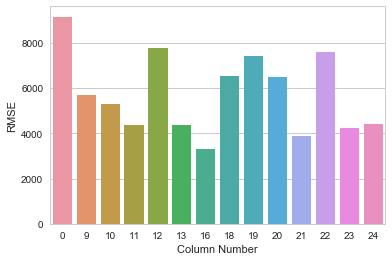

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")
ax = sns.barplot(full_X, attribute_results)
ax.set(xlabel="Column Number", ylabel="RMSE")

From the RMSEs generated using k-nearest neighbours, it seems that column 16 (engine size) is the best at predicting the price of each car, whereas columns 0, 12, 22, 18, 19 and 20 (symboling, height, peak RPM, and bore and stroke size, and compression ratio) seem to stand out as poor indicators of a car's value. This is mostly borne out by the Pearson correlation results below, although column 18 does appear to surprise with a correlation index magnitude of over 0.5.

In [14]:
norm_corrs = norm_cars.corr()[25].apply(np.absolute).sort_values(ascending=False)
norm_corrs

25    1.000000
16    0.872335
13    0.834415
21    0.809681
11    0.751265
24    0.704692
10    0.690628
23    0.686571
9     0.584642
18    0.543154
12    0.135486
22    0.101542
0     0.082391
19    0.082267
20    0.071107
Name: 25, dtype: float64

We choose, therefore, to do our predictions with the top seven predictors from the RMSEs and from the Pearson correlations with price from the above series: columns 16, 13, 21, 10 and 11, and 24 and 23 (engine size, curb weight, horsepower, length and width, and RPMs for both cities and highways).

The dataframe and graphs below give an indication of the correlations between each of these 7 factors with each other and the price.

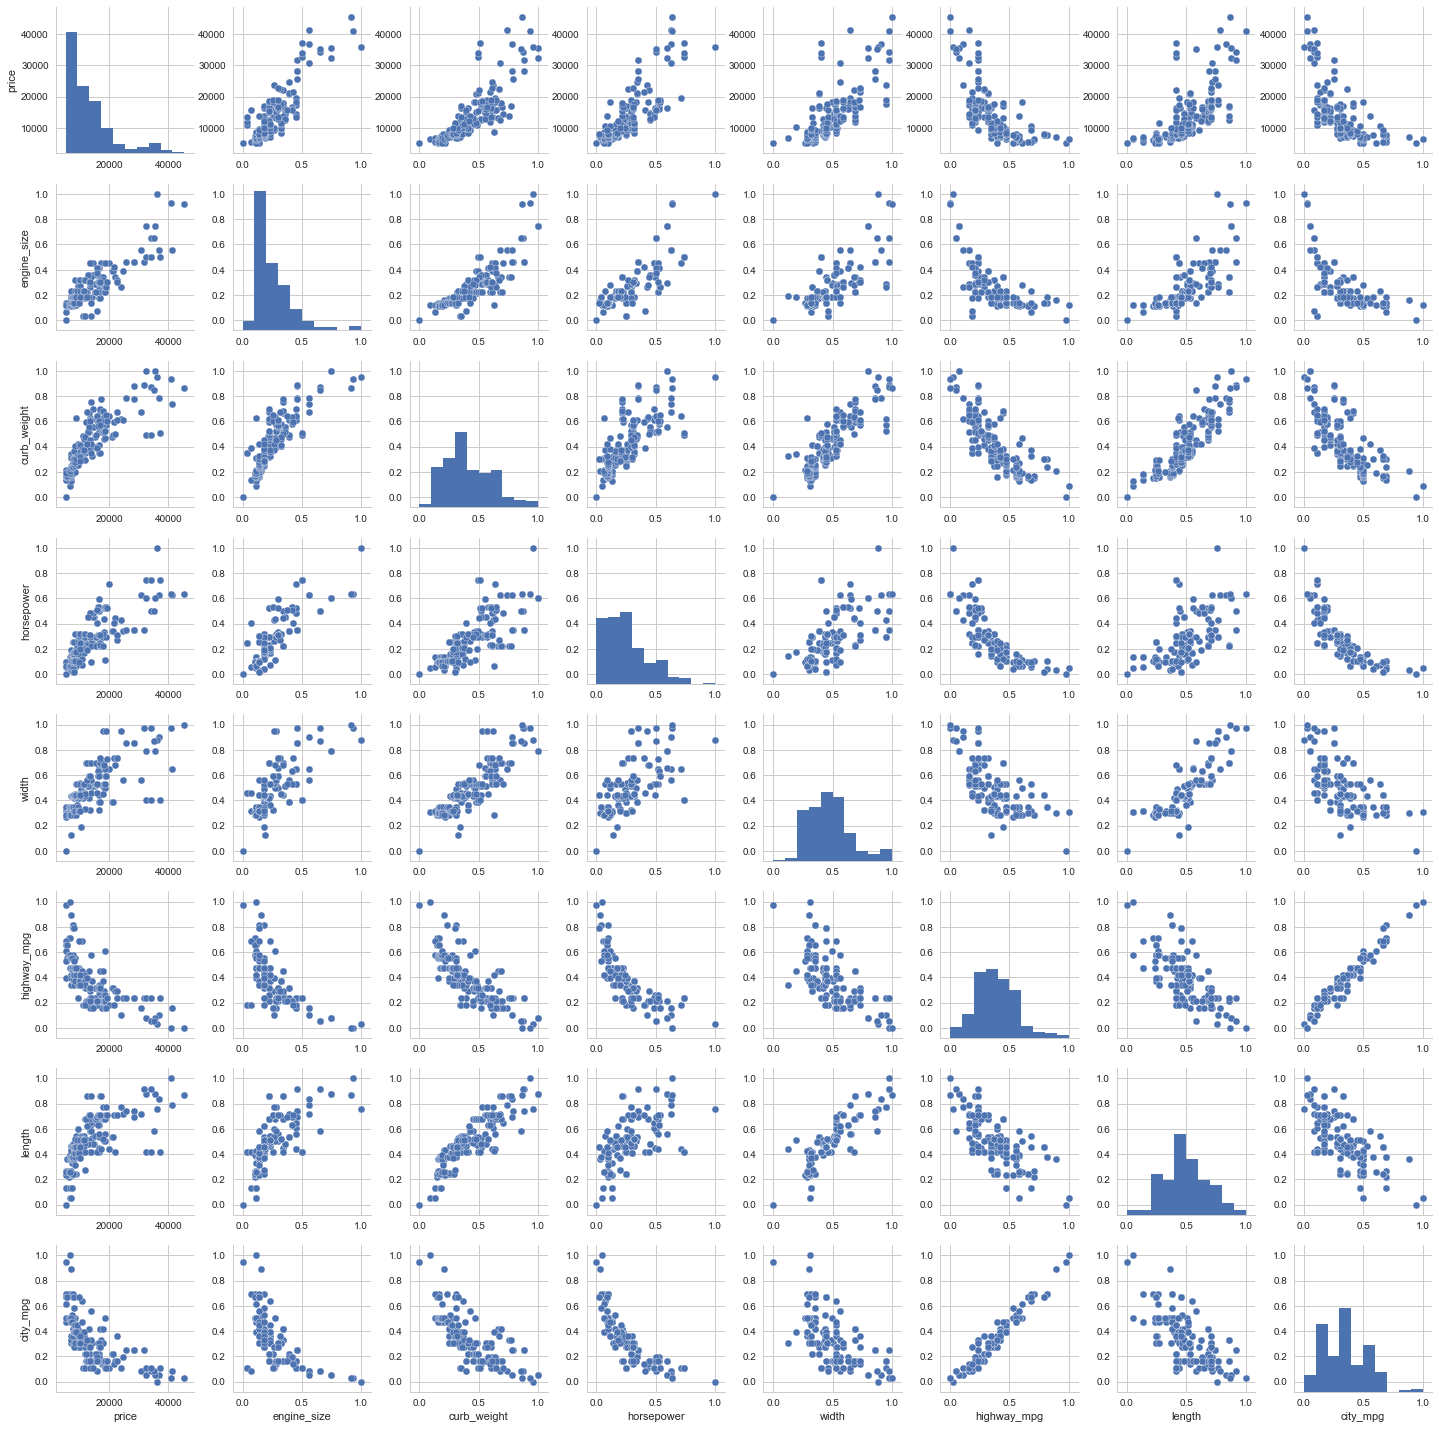

In [15]:
import seaborn as sns

rel_cols = norm_corrs.index[0:8]
rel_data = norm_cars[rel_cols]
rel_data.columns = [num_dict[x] for x in rel_data.columns]
sns.pairplot(rel_data)

In [16]:
rel_data.corr()

,price,engine_size,curb_weight,horsepower,width,highway_mpg,length,city_mpg
price,1.000000,0.872335,0.834415,0.809681,0.751265,-0.704692,0.690628,-0.686571
engine_size,0.872335,1.000000,0.849072,0.822649,0.729436,-0.679571,0.685025,-0.650546
curb_weight,0.834415,0.849072,1.000000,0.757994,0.866201,-0.794889,0.880665,-0.749543
horsepower,0.809681,0.822649,0.757994,1.000000,0.615006,-0.804587,0.579731,-0.822138
width,0.751265,0.729436,0.866201,0.615006,1.000000,-0.680635,0.857170,-0.633531
highway_mpg,-0.704692,-0.679571,-0.794889,-0.804587,-0.680635,1.000000,-0.698142,0.972044
length,0.690628,0.685025,0.880665,0.579731,0.857170,-0.698142,1.000000,-0.665192
city_mpg,-0.686571,-0.650546,-0.749543,-0.822138,-0.633531,0.972044,-0.665192,1.000000


There are are a number of interesting points that we gather from the above tables:

The first is that, with correlation value of approximately 0.97, the fuel efficiencies in cities and on highways of each vehicle are extraordinarily correlated. Since they give basically the same information, we shall omit the 'city' column (i.e. the column which correlates less with 'price') from use in further predictions.

However, we also notice that 'curb_weight' is highly correlated with both 'weight' and 'height'. This makes some sense: 'curb_weight' basically denotes the overall weight of the car, and with cars usually being made of similarly dense materials, one can expect a high correlation between it and the volume of the car. Given that the car heights are pretty  (standard deviation of 2.14" compared to a mean of 53.7"), and seeing before that the height of a car is practically irrelevant to the price (correlation index of ~0.14), it is reasonable to presume that there is a strong correlation between 'curb_weight' and the area of the chassis, which can be approximated by the product of weight and height.

In [17]:
rel_data["WxL"] = rel_data["width"] * rel_data["length"]
rel_data.corr()

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,engine_size,curb_weight,horsepower,width,highway_mpg,length,city_mpg,WxL
price,1.000000,0.872335,0.834415,0.809681,0.751265,-0.704692,0.690628,-0.686571,0.770845
engine_size,0.872335,1.000000,0.849072,0.822649,0.729436,-0.679571,0.685025,-0.650546,0.745086
curb_weight,0.834415,0.849072,1.000000,0.757994,0.866201,-0.794889,0.880665,-0.749543,0.889310
horsepower,0.809681,0.822649,0.757994,1.000000,0.615006,-0.804587,0.579731,-0.822138,0.591334
width,0.751265,0.729436,0.866201,0.615006,1.000000,-0.680635,0.857170,-0.633531,0.961861
highway_mpg,-0.704692,-0.679571,-0.794889,-0.804587,-0.680635,1.000000,-0.698142,0.972044,-0.674388
length,0.690628,0.685025,0.880665,0.579731,0.857170,-0.698142,1.000000,-0.665192,0.923021
city_mpg,-0.686571,-0.650546,-0.749543,-0.822138,-0.633531,0.972044,-0.665192,1.000000,-0.616775
WxL,0.770845,0.745086,0.889310,0.591334,0.961861,-0.674388,0.923021,-0.616775,1.000000


We find that 'WxL' is indeed more correlated to 'price' than both 'width' and 'height', though only marginally. It is extremely correlated, however, with both of its two factors (correlation scores of ~0.96 and ~0.92), and so if we keep it we can remove height and width as key indicators. Since the difference in correlation score between 'WxH' and 'width' is very slight, we decide to do this.

A final point is that there are a number of columns for which the scatter graphs relating their attribute to 'price' are markedly curved. This is probably related to the high right-skewness of the 'price' data. We correct for this by considering the log normal value of the prices instead. This will require a translation back for the final predictive function, but it will bring the form of the results back into line with its factors, which are already demonstrating at least somewhat normal distributive behaviour.

The only attribute which does not fit a normal distribution is 'engine_size'. This is right-skewed as well, and as such we consider the logarithm of it instead.

In [18]:
new_rel = rel_data.drop(columns=["city_mpg", "width", "length"])
max_price = new_rel["price"].max()
new_rel["nlog_price"] = np.log(new_rel["price"] / max_price)

new_rel.corr()

,price,engine_size,curb_weight,horsepower,highway_mpg,WxL,nlog_price
price,1.000000,0.872335,0.834415,0.809681,-0.704692,0.770845,0.956871
engine_size,0.872335,1.000000,0.849072,0.822649,-0.679571,0.745086,0.829967
curb_weight,0.834415,0.849072,1.000000,0.757994,-0.794889,0.889310,0.891455
horsepower,0.809681,0.822649,0.757994,1.000000,-0.804587,0.591334,0.832537
highway_mpg,-0.704692,-0.679571,-0.794889,-0.804587,1.000000,-0.674388,-0.782675
WxL,0.770845,0.745086,0.889310,0.591334,-0.674388,1.000000,0.799704
nlog_price,0.956871,0.829967,0.891455,0.832537,-0.782675,0.799704,1.000000


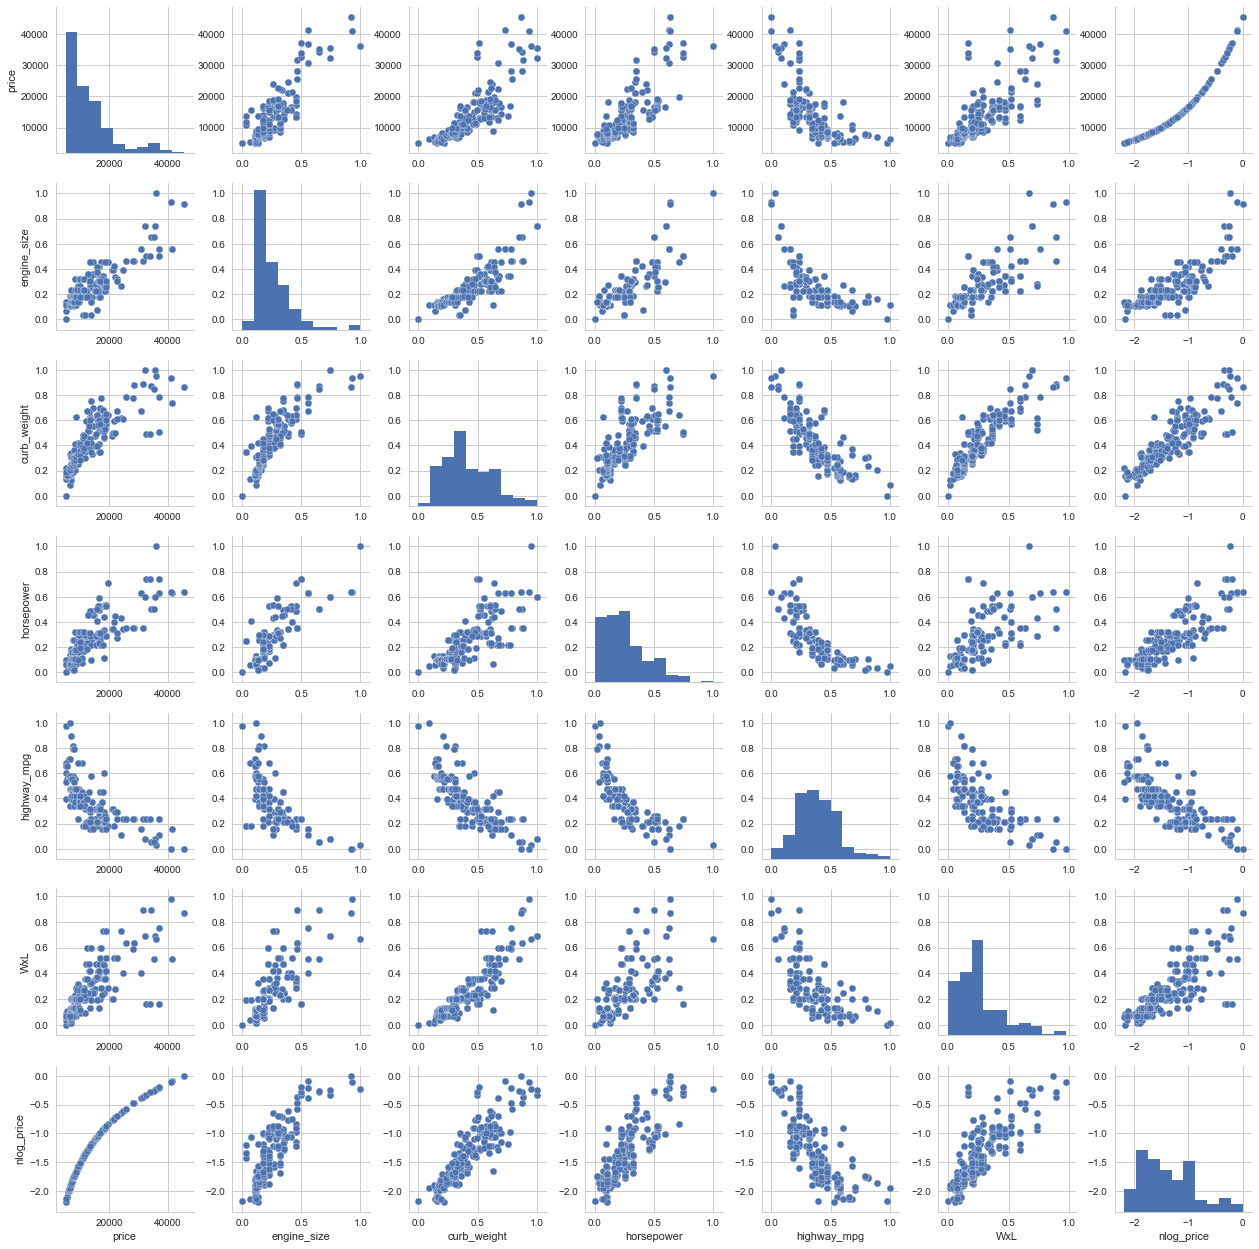

In [19]:
sns.pairplot(new_rel)

## K-Nearest Neighbours Model

We now turn our attention to creating predictive models, and for simplicity we will start with K-Nearest Neighbours. We have already devised a function 'knn_train_test' to provide RMSE score from cross-validation tests with the algorithm. At this point, we will try numerous choices of the hyperparameter k (i.e. the number of neighbours taken into account) and see which provides us with the model most likely to proceed on a test set.

In [20]:
X = new_rel.corr()["nlog_price"].sort_values(ascending=False).index
X = [x for x in X if x not in ["price", "nlog_price"]]
X

['curb_weight', 'horsepower', 'engine_size', 'WxL', 'highway_mpg']

[0.1809858183289054, 0.18501026312695623, 0.17778897378532071, 0.18572010262991867, 0.18952124575936544, 0.19171988463522516, 0.19764199293640286, 0.2014489073551855, 0.20108446709956404, 0.2041958758244424, 0.20529140171480167, 0.20686324563716199, 0.20966561535761913, 0.21172157255283305, 0.214542122981841, 0.21627740708029114, 0.21910652680370124, 0.22095391585923521]


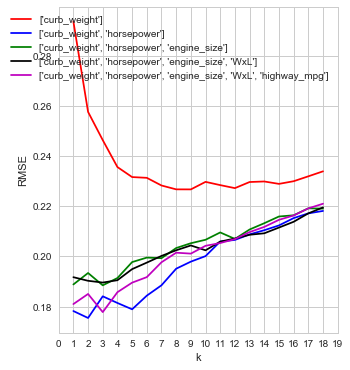

In [21]:
y = "nlog_price"
fig, ax = plt.subplots(figsize=(5,6))
rmses = []
colors = ['w','r','b','g','k','m']

for x in range(1,6):
    X_rmses = []
    for k in range(1,19):
        X_rmses.append(knn_train_test(X[0:x], y, new_rel, k, 4, 53))
    plt.plot(np.arange(1,19),X_rmses,color=colors[x], label=str(X[:x]))
    rmses.append(X_rmses)
    
ax.set_xlabel("k")
ax.set_ylabel("RMSE")
plt.xticks(np.arange(0,20,1))
plt.legend()

fives = [knn_train_test(["curb_weight", "horsepower", "engine_size", "WxL", "highway_mpg"], y, new_rel, k, 4, 53) for k in range(1,19)]
print(fives)

The 'sweet spot' for neighbours seems to occur at k=2 when only the best two features ('curb_weight' and 'horsepower') are taken into account. This is followed very closely by the combination of k=3 and all the remaining features. Using this, and translating our logarithmic predictions back to standard prices, we obtain two full predictive models which we can compare.

In [22]:
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(2)
best_X = ["curb_weight", "horsepower"]

knn.fit(new_rel[best_X], new_rel[y])
results = new_rel
results["nlog_predict"] = knn.predict(results[best_X])
results["prediction"] = np.exp(results["nlog_predict"]) * max_price

knn_rmse = np.sqrt(mean_squared_error(results["price"], results["prediction"]))
knn_rmse

1254.1561848183785

Given k = 2 with 2 training set features, we get a training RMSE score of ~1254 is a great improvement on the rudimentary models' cross-validation scores from before.

In [23]:
knn = KNeighborsRegressor(3)
best_X = ["curb_weight", "horsepower"]

knn.fit(new_rel[X], new_rel[y])
results = new_rel
results["nlog_predict"] = knn.predict(results[X])
results["prediction"] = np.exp(results["nlog_predict"]) * max_price

knn_rmse = np.sqrt(mean_squared_error(results["price"], results["prediction"]))
knn_rmse

1755.9719642259986

With k = 3 with 5 training set features, we surprisingly get an RMSE which is over 500 points, i.e. about 40%, higher. However, what is most important is the robustness of the models on data they have not seen. We test this, and all the other models from before, by training on only 75% of the data, leaving the rest for validation.

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


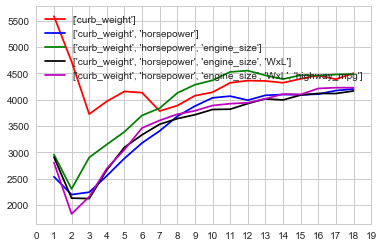

In [27]:
from sklearn.utils import shuffle

shuffled_df = shuffle(new_rel, random_state=94)
train_df = shuffled_df.iloc[:151]
test_df = shuffled_df.iloc[151:]
rmses = []

for x in range(1,6):
    X_rmses = []
    for k in range(1,19):
        knn = KNeighborsRegressor(k)
        knn.fit(train_df[X[0:x]], train_df[y])
        test_df["nlog_predict"] = knn.predict(test_df[X[0:x]])
        test_df["prediction"] = np.exp(test_df["nlog_predict"]) * max_price
        X_rmses.append(np.sqrt(mean_squared_error(test_df["price"], test_df["prediction"])))
    plt.plot(np.arange(1,19),X_rmses,color=colors[x], label=str(X[:x]))
    rmses.append(X_rmses)

#print(rmses)
plt.xticks(np.arange(0,20,1))
plt.legend()

From this, we see that a model built using all five remaining features is best, as appeals to intuition. However, it seems that the best results come from having k = 2. This model gives an RMSE of ~1826, the only one under 2000. Under further evidence, using these parameters with the full training set provide an RMSE on training set itself of ~1354, which is only 7% higher than our previously favoured model's.

As such, we have our favoured k-Nearest Neighbours model: k = 2, using all five of the features remaining to us: 'curb_weight', 'horsepower', 'engine_size', 'WxL', and 'highway_mpg'.

## Linear Regression Model

At this point, we should consider looking at an alternative model. k-Nearest Neighbours is a simple model structure, and there are more advanced ones which may provide better results. Not going too advanced (we are dealing with such a small data set after all), it seems reasonable to see if we can find a moderate improvement in our predictions by considering a linear regression model.

The methodology used below is very similar to the above, only employing linear regression techniques instead of k-Nearest Neighbours.

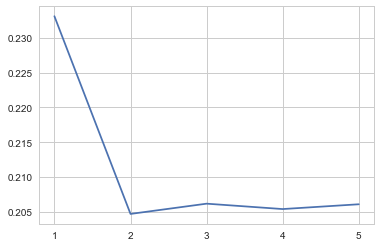

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
kf = KFold(n_splits=4, shuffle=True, random_state=19)
X_rmses = []
for x in range(1,6):
    mses = cross_val_score(lr, new_rel[X[:x]], new_rel[y], scoring="neg_mean_squared_error", cv=kf)
    X_rmses.append(np.sqrt(np.mean(-1*mses)))  
    
plt.plot(range(1,6), X_rmses)
ax.set_xlabel("Number of features used")
ax.set_ylabel("RMSE")
plt.xticks(np.arange(1,6,1))
plt.legend()

The 'elbow' in the model is very clear: after using the two most correlating columns in the set, we obtain virtually no benefit from the third. This likely means that any more information used will lead to over-fitting: the best linear regression model we are likely to obtain is using only the two features 'curb_weight' and 'horsepower'.

For the sake of completeness, we test the four most complex models, all of which having similar RMSEs for the logarithm of the normed price, to see how well they cope compared to the k-Nearest Neighbour models.

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


([<matplotlib.axis.XTick at 0x1d0011cd390>,
 <a list of 4 Text xticklabel objects>)

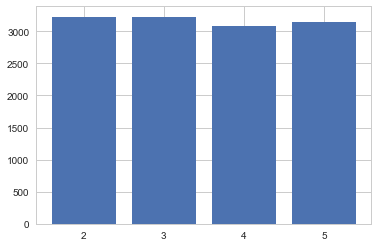

In [32]:
X_rmses = []
for x in range(2,6):
    lr.fit(train_df[X[0:x]], train_df[y])
    test_df["nlog_predict"] = lr.predict(test_df[X[0:x]])
    test_df["prediction"] = np.exp(test_df["nlog_predict"]) * max_price
    X_rmses.append(np.sqrt(mean_squared_error(test_df["price"], test_df["prediction"])))

plt.bar(np.arange(2,6), X_rmses)
    
ax.set_xlabel("Number of features used")
ax.set_ylabel("RMSE")
plt.xticks(np.arange(2,6,1))

The graph indicates that the RMSE of the four linear models are all very similar, with RMSEs of over 3000.

## Conclusions

In spite of its reputation as being somewhat more primitive as a machine learning method, k-nearest neighbours seems to have given better models in general than linear regression. The best KNN models have RMSEs which are a third less than the RMSEs of the linear models.

Although this is a surprise, the size of the data set certainly made this situation a possibility. With only 201 usable examples of vehicles available, more advanced algorithms would be unlikely to provide any more insights as the data used stands.

However, we only made use of the completely numerical data, which is a waste of the resources available to us. Many of the columns of categorical data, containing details on the fuel type, body type, number of cylinders, etc, could very well be good primary indicators of price. In the future, I hope to look more into these columns of data. I expect that decision trees and random forests could be of use.